In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Provide the full path of your file
file_path = r"E:\Study Materials\4.1\AI\AI Lab\Dataset\Housing.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [2]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values
missing_values


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [5]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [6]:
df2 = df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode binary categorical features using LabelEncoder
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
encoder = LabelEncoder()

for column in binary_columns:
    df2[column] = encoder.fit_transform(df2[column])

# # One-hot encode the 'furnishingstatus' column
# data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# # Scale numeric features
# scaler = StandardScaler()
# numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# data[numeric_features] = scaler.fit_transform(data[numeric_features])

# # Display the processed data
# data.head()


In [8]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
# One-hot encode the 'furnishingstatus' column
df2 = pd.get_dummies(df2, columns=['furnishingstatus'], drop_first=True)

In [10]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [11]:
# Scale numeric features
scaler = StandardScaler()
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

In [12]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0,0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df2.drop('price', axis=1)
y = df2['price']

# # Split into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Display the shapes of the resulting datasets
# (X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [14]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0,0
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0,0
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1,0
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0,0
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0,0


In [15]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [26]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((436, 13), (109, 13), (436,), (109,))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Create a linear regression model
model = LinearRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model's performance
# mae = mean_absolute_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)

# (mae, r_squared)


In [29]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
(mae, mse, r_squared)

(970043.4039201641, 1754318687330.6682, 0.6529242642153175)

In [34]:
# Return the actual and predicted prices
actual_vs_predicted = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

actual_vs_predicted

,Actual Price,Predicted Price
316,4060000,5.164654e+06
77,6650000,7.224722e+06
360,3710000,3.109863e+06
90,6440000,4.612075e+06
493,2800000,3.294646e+06
...,...,...
15,9100000,4.973331e+06
357,3773000,4.336651e+06
39,7910000,7.059063e+06
54,7350000,6.398941e+06


In [35]:
# Convert the predicted prices to integers
actual_vs_predicted['Predicted Price'] = actual_vs_predicted['Predicted Price'].astype(int)

# Display the updated DataFrame
actual_vs_predicted.head()


,Actual Price,Predicted Price
316,4060000,5164653
77,6650000,7224722
360,3710000,3109863
90,6440000,4612075
493,2800000,3294646


In [23]:
# Extract the coefficients and create a DataFrame for interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display the coefficients
coefficients


,Feature,Coefficient
8,airconditioning,685839.345600
7,hotwaterheating,616375.422719
2,bathrooms,559614.480930
0,area,549164.541650
10,prefarea,509192.088813
6,basement,482603.521882
4,mainroad,408073.681907
3,stories,361644.239779
5,guestroom,275710.533052
9,parking,260916.619069


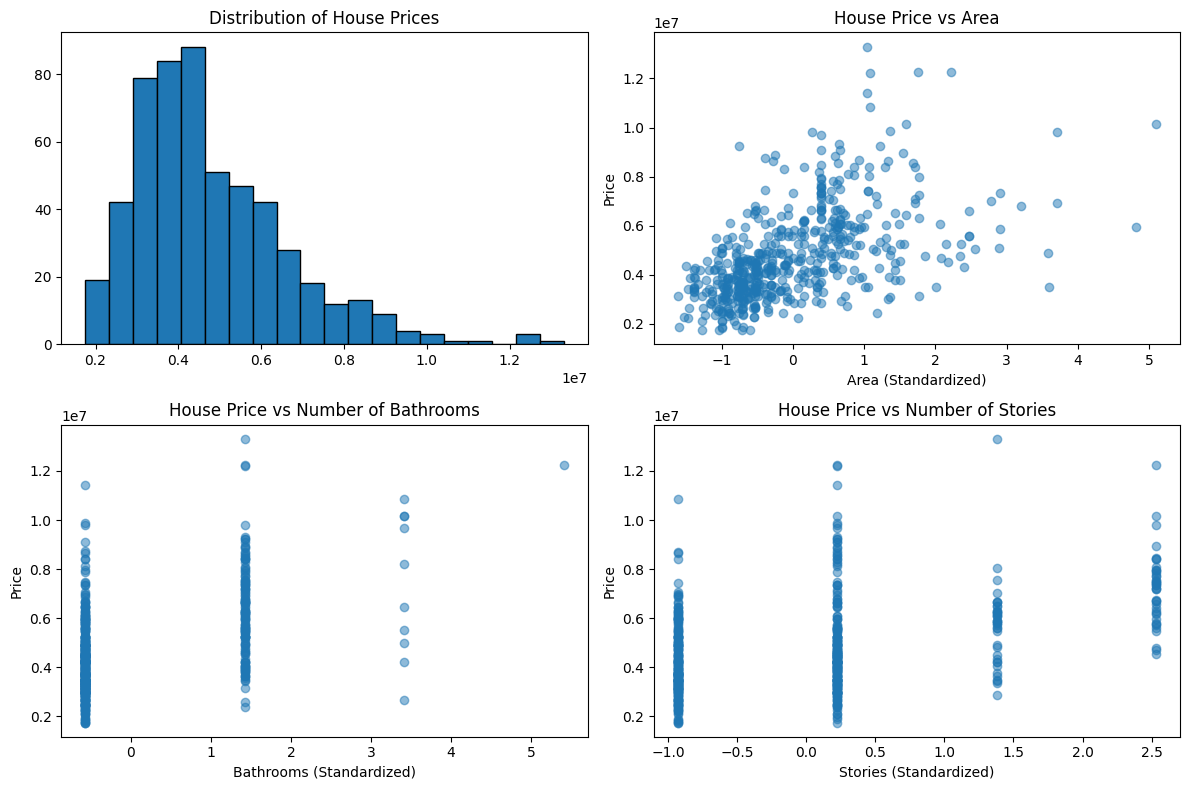

In [24]:
import matplotlib.pyplot as plt

# Plotting histograms for target variable (price) and key features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df2['price'], bins=20, edgecolor='black')
plt.title('Distribution of House Prices')

plt.subplot(2, 2, 2)
plt.scatter(df2['area'], df2['price'], alpha=0.5)
plt.title('House Price vs Area')
plt.xlabel('Area (Standardized)')
plt.ylabel('Price')

plt.subplot(2, 2, 3)
plt.scatter(df2['bathrooms'], df2['price'], alpha=0.5)
plt.title('House Price vs Number of Bathrooms')
plt.xlabel('Bathrooms (Standardized)')
plt.ylabel('Price')

plt.subplot(2, 2, 4)
plt.scatter(df2['stories'], df2['price'], alpha=0.5)
plt.title('House Price vs Number of Stories')
plt.xlabel('Stories (Standardized)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


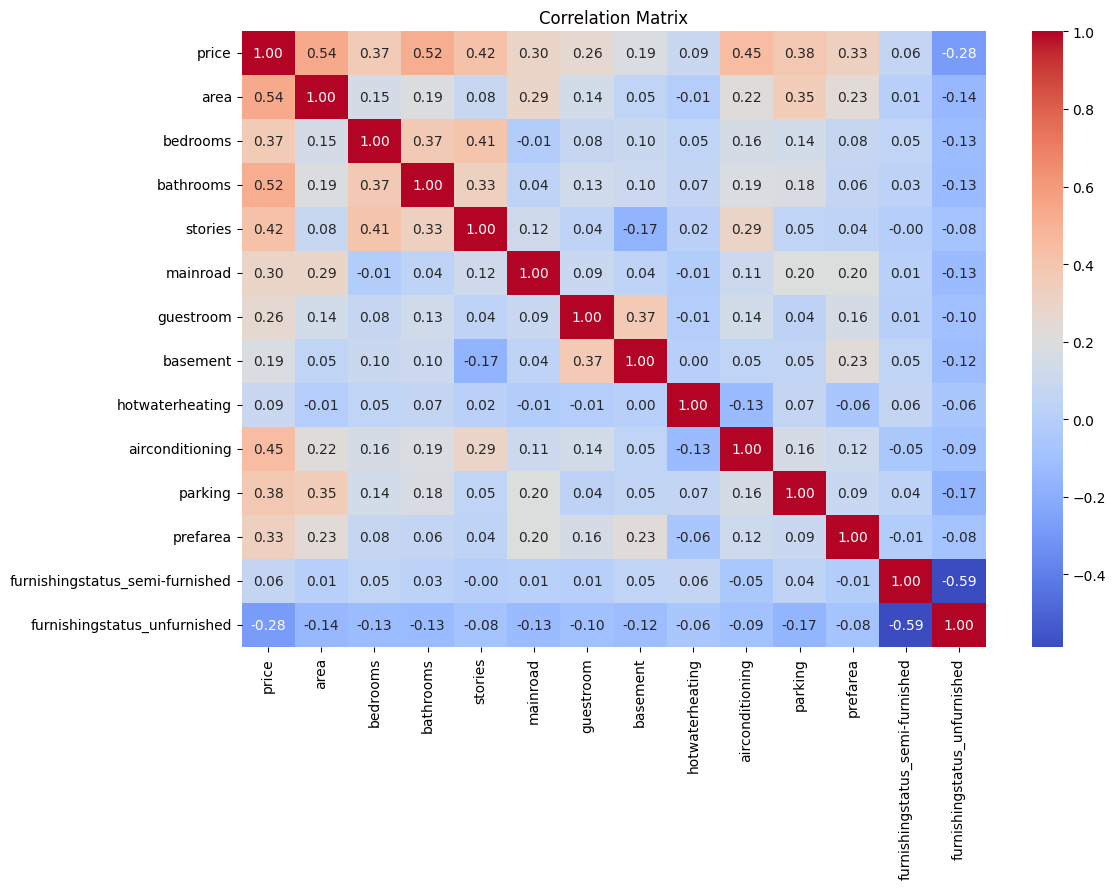

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [25]:
import tensorflow as tf
from tensorflow import keras

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer with 64 neurons
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    keras.layers.Dense(1)  # Output layer with 1 neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/500


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 24573309353984.0000 - mae: 4672219.0000 - val_loss: 26268974186496.0000 - val_mae: 4768816.0000
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26731727552512.0000 - mae: 4853723.0000 - val_loss: 26268913369088.0000 - val_mae: 4768809.5000
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25357382057984.0000 - mae: 4763878.5000 - val_loss: 26268737208320.0000 - val_mae: 4768792.0000
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25817377669120.0000 - mae: 4745524.5000 - val_loss: 26268319875072.0000 - val_mae: 4768751.5000
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24590738784256.0000 - mae: 4652927.0000 - val_loss: 26267512471552.0000 - val_mae: 4768674.5000
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26771233701888.0000 - mae: 4835226.5000 - val_loss: 26266157711360.0000 - val_mae: 4768546.5000
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25627283423232.0000 - m

In [30]:
import numpy as np
import pandas as pd

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
# Numpy version: 2.1.2
# Pandas version: 2.2.3

Numpy version: 2.1.2
Pandas version: 2.2.3


In [31]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print("\nTest Mean Absolute Error:", test_mae)

# Make predictions
predictions = model.predict(X_test)
print("\nPredicted Prices:", predictions.flatten())

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1779417088000.0000 - mae: 1001575.0000

Test Mean Absolute Error: 998436.5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Predicted Prices: [ 4576351.    6662480.    3001262.    4975841.    2152683.5   3672921.2
  4792144.    6025653.5   1927699.8    379987.28 10132367.    2885403.5
  2493763.2   2676693.    4265541.    4407987.    3006448.    5333335.5
  4924190.    3470485.5   6670531.    6940767.    2817174.8   5697595.5
  5512824.    7991136.    3911673.5   4635438.5   7956766.    2295872.
  7277802.5   3513220.2   6220435.5   4231827.5   3821399.5   6079351.5
  5405926.    5327609.    2556857.    3476672.    4482200.5   3943269.5
  6643328.5   2912278.2   3650035.5   4691693.    7193057.5   4088139.2
  3870773.5   3836366.    7872845.    2870381.    3152824.5   4142496.5
  4307089.5    430261.28  8515478.    3132275.5   4312876.    2853324.
  4960633.5   2588475.5   5332196.    5019080.    5051313.    4650139.5
  6686197.    4033323.5   6302078

In [32]:
# Return the actual and predicted prices
actual_vs_predicted = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': predictions.flatten()
})

In [29]:
actual_vs_predicted.head()

,Actual Price,Predicted Price
316,4060000,4576351.0
77,6650000,6662480.0
360,3710000,3001262.0
90,6440000,4975841.0
493,2800000,2152683.5
